In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [3]:
data1 = pd.read_csv('../../csv/cfinal1.csv')
data=data1.sample(frac = 1)
X = data.iloc[:,2:36]  #independent columns
x = X.drop(columns=['word_sim_n_score'])
y = data.iloc[:,-1]   

In [4]:
sc = StandardScaler()
x_t = sc.fit_transform(x)

In [ ]:
x_t
#y

In [11]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [13]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns

In [15]:
featureScores

,features,Score
0,para_count,29.803353
1,word_count,1324.487872
2,sentence_count,78.741866
3,sentence_len(mean),4.371057
4,sentence_len(mode),0.017575
5,sentence_len(max),80.929551
6,sentence_len(min),0.536553
7,stop_words,64.427681
8,sw_rates,29.766527
9,unique_words,218.667883


In [16]:
print(featureScores.nlargest(10,'Score')) 

                 features        Score
23       word_sim_p_count  1397.485748
1              word_count  1324.487872
16  number_of_repeatation   612.370809
26         word_sim_score   313.725139
24       word_sim_p_score   312.001158
35       discourse_marker   297.474466
9            unique_words   218.667883
15              most_freq   150.968049
5       sentence_len(max)    80.929551
2          sentence_count    78.741866


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_t,y)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08394678 0.04464721 0.03017157 0.01851873 0.00937696 0.02441978
 0.0086929  0.01178871 0.03674086 0.01055636 0.05925216 0.01417942
 0.01015902 0.04028153 0.00604591 0.02562909 0.03001187 0.04471977
 0.01603766 0.09263421 0.01285698 0.00794496 0.00597401 0.03494101
 0.02345946 0.00702857 0.02765454 0.03181269 0.03929654 0.07061171
 0.00869803 0.05364106 0.0120047  0.00660433 0.00590752 0.03375339]


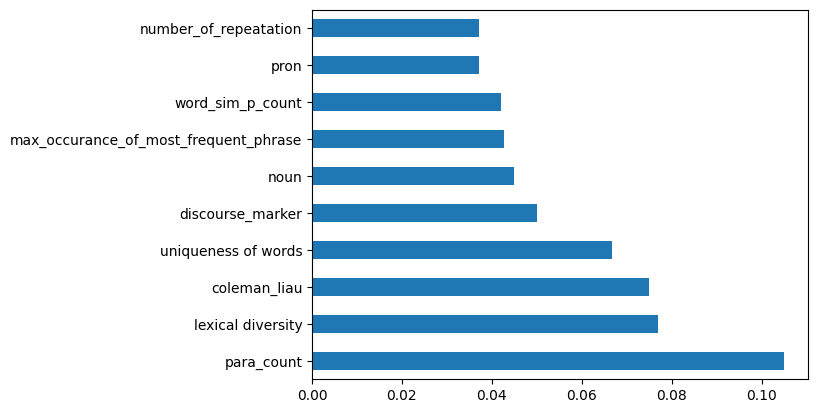

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
data

/tmp/ipykernel_2900269/3513936419.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


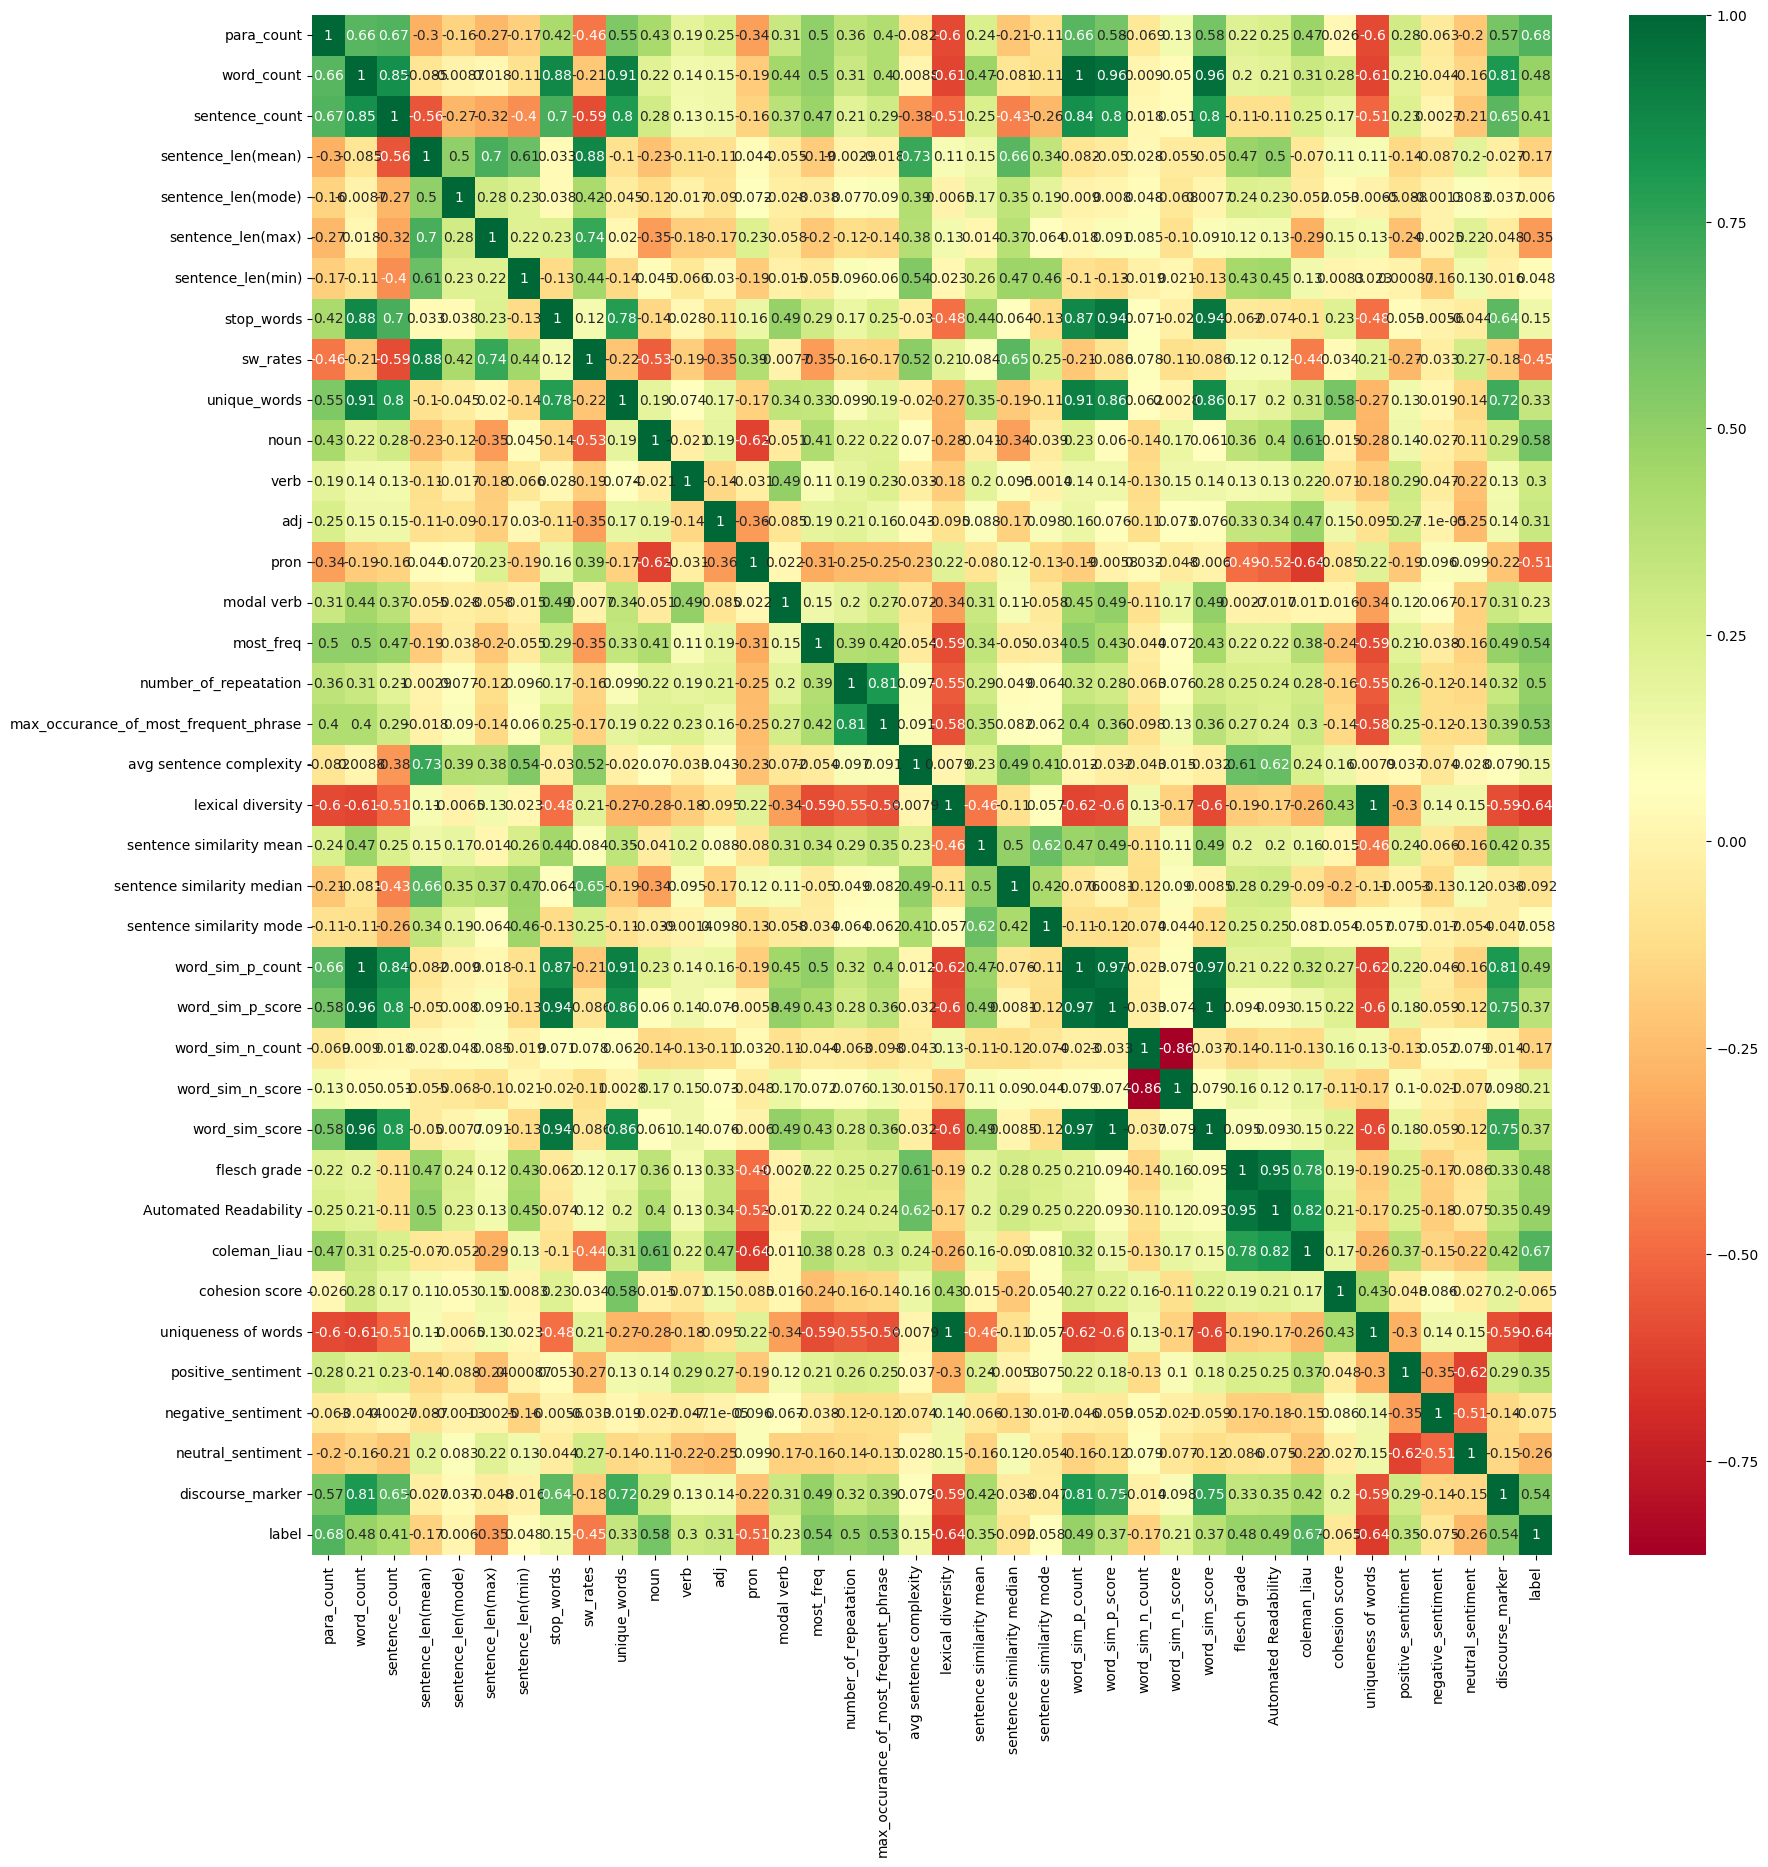

In [19]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.5)
var_thres.fit(x_t)

VarianceThreshold(threshold=0.5)

In [33]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x, 0.8)
len(set(corr_features))

11

In [6]:
corr_features

{'Automated Readability',
 'coleman_liau',
 'discourse_marker',
 'lexical diversity',
 'max_occurance_of_most_frequent_phrase',
 'sentence_count',
 'sw_rates',
 'unique_words',
 'word_sim_p_count',
 'word_sim_p_score',
 'word_sim_score'}

In [ ]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [41]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x, y)
mutual_info

array([0.33212929, 0.26774402, 0.24175526, 0.08061596, 0.01620395,
       0.15973489, 0.02585567, 0.12983881, 0.18452657, 0.10275872,
       0.18140842, 0.03943128, 0.02155959, 0.21637984, 0.07451596,
       0.17573959, 0.18910199, 0.1951156 , 0.09998198, 0.28048213,
       0.08599876, 0.02462769, 0.03828198, 0.29833875, 0.20859401,
       0.06268161, 0.20981876, 0.12547058, 0.19500568, 0.32976069,
       0.04709782, 0.28048213, 0.04725975, 0.00814444, 0.03709323,
       0.23797997])

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

para_count                               0.332129
coleman_liau                             0.329761
word_sim_p_count                         0.298339
uniqueness of words                      0.280482
lexical diversity                        0.280482
word_count                               0.267744
sentence_count                           0.241755
discourse_marker                         0.237980
pron                                     0.216380
word_sim_score                           0.209819
word_sim_p_score                         0.208594
max_occurance_of_most_frequent_phrase    0.195116
Automated Readability                    0.195006
number_of_repeatation                    0.189102
sw_rates                                 0.184527
noun                                     0.181408
most_freq                                0.175740
sentence_len(max)                        0.159735
stop_words                               0.129839
flesch grade                             0.125471


In [44]:
from sklearn.feature_selection import chi2
f_p_values=chi2(x,y)

In [45]:
f_p_values

(array([2.98033527e+01, 1.32448787e+03, 7.87418655e+01, 4.37105667e+00,
        1.75746924e-02, 8.09295506e+01, 5.36552649e-01, 6.44276809e+01,
        2.97665273e+01, 2.18667883e+02, 4.83841127e-01, 1.04415527e-01,
        1.76171774e-01, 7.03619666e-01, 3.36875000e+01, 1.50968049e+02,
        6.12370809e+02, 4.04389800e+01, 6.02198199e-01, 7.28810897e-01,
        1.75641575e-02, 8.82077892e-04, 7.75717543e-03, 1.39748575e+03,
        3.12001158e+02, 2.65042254e+01, 3.13725139e+02, 2.40529033e+01,
        2.66837626e+01, 5.72166827e+01, 2.12136214e-02, 7.28810897e-01,
        7.92954870e-01, 6.69078137e-02, 9.88434482e-02, 2.97474466e+02]),
 array([4.78164366e-008, 5.39140077e-290, 7.07795802e-019, 3.65543177e-002,
        8.94533795e-001, 2.33909578e-019, 4.63864942e-001, 1.00141326e-015,
        4.87333910e-008, 1.76585986e-049, 4.86687576e-001, 7.46593826e-001,
        6.74684011e-001, 4.01570101e-001, 6.47152038e-009, 1.06505397e-034,
        3.41267513e-135, 2.02853368e-010, 4.37

In [46]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x.columns
p_values

para_count                                4.781644e-08
word_count                               5.391401e-290
sentence_count                            7.077958e-19
sentence_len(mean)                        3.655432e-02
sentence_len(mode)                        8.945338e-01
sentence_len(max)                         2.339096e-19
sentence_len(min)                         4.638649e-01
stop_words                                1.001413e-15
sw_rates                                  4.873339e-08
unique_words                              1.765860e-49
noun                                      4.866876e-01
verb                                      7.465938e-01
adj                                       6.746840e-01
pron                                      4.015701e-01
modal verb                                6.471520e-09
most_freq                                 1.065054e-34
number_of_repeatation                    3.412675e-135
max_occurance_of_most_frequent_phrase     2.028534e-10
avg senten

In [47]:
p_values.sort_index(ascending=False)

word_sim_score                            3.370883e-70
word_sim_p_score                          8.003691e-70
word_sim_p_count                         7.392337e-306
word_sim_n_count                          2.629623e-07
word_count                               5.391401e-290
verb                                      7.465938e-01
uniqueness of words                       3.932689e-01
unique_words                              1.765860e-49
sw_rates                                  4.873339e-08
stop_words                                1.001413e-15
sentence_len(mode)                        8.945338e-01
sentence_len(min)                         4.638649e-01
sentence_len(mean)                        3.655432e-02
sentence_len(max)                         2.339096e-19
sentence_count                            7.077958e-19
sentence similarity mode                  9.298172e-01
sentence similarity median                9.763065e-01
sentence similarity mean                  8.945652e-01
pron      

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression


f_test, _ = f_regression(x, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(x, y)
mi /= np.max(mi)

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()